In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import duckdb

In [5]:
#Read in the dataset 
df = pd.read_csv('ds_challenge_v2_1_data.csv')
df

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,Strark,other,Paid,1/15/16,NaN,NaN,NaN,NaN,NaN,NaN
54677,54678,Strark,other,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
54678,54679,Strark,ios web,Organic,1/6/16,NaN,NaN,NaN,NaN,NaN,NaN
54679,54680,Berton,android web,Paid,1/18/16,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    54681 non-null  int64  
 1   city_name             54681 non-null  object 
 2   signup_os             47824 non-null  object 
 3   signup_channel        54681 non-null  object 
 4   signup_date           54681 non-null  object 
 5   bgc_date              32896 non-null  object 
 6   vehicle_added_date    13134 non-null  object 
 7   vehicle_make          13223 non-null  object 
 8   vehicle_model         13223 non-null  object 
 9   vehicle_year          13223 non-null  float64
 10  first_completed_date  6137 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB
None
   id city_name    signup_os signup_channel signup_date bgc_date  \
0   1    Strark      ios web           Paid      1/2/16      NaN   
1   2    Strark      wind

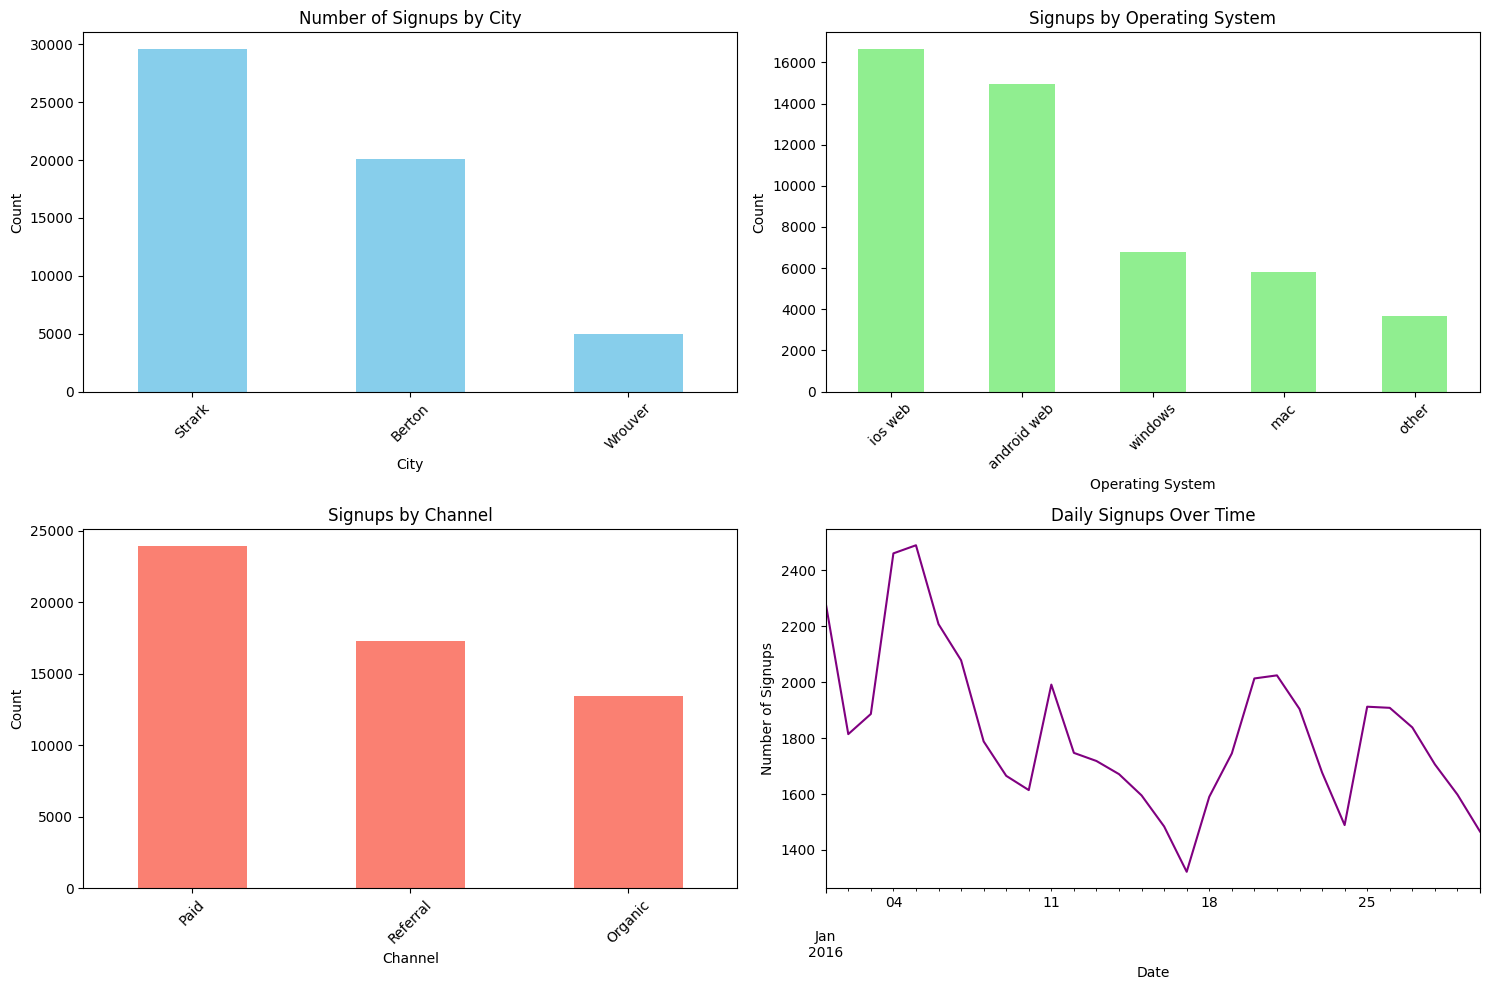

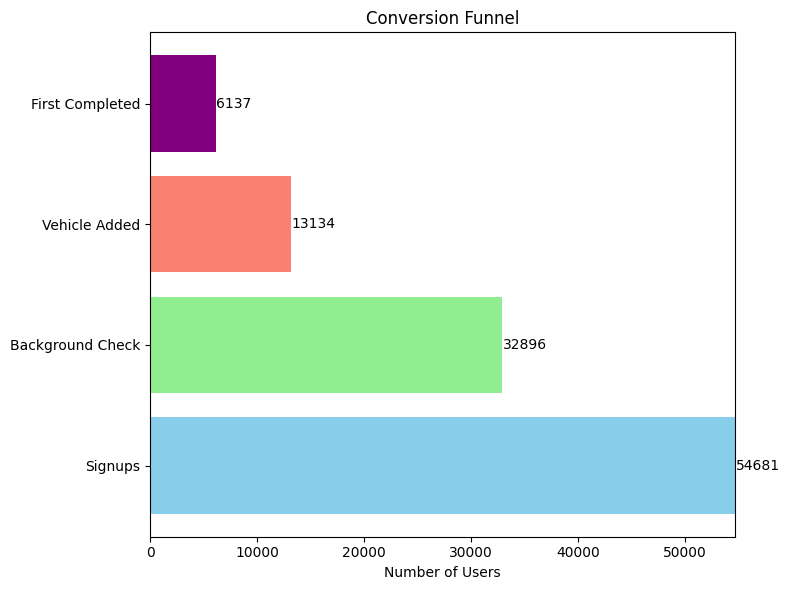

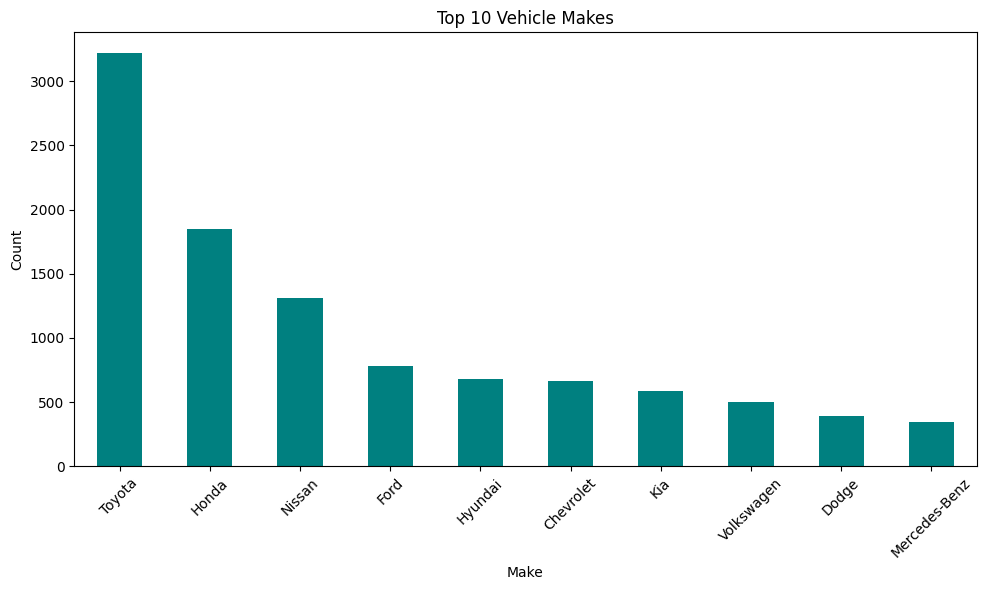

/tmp/ipykernel_2010/2530703583.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed['time_to_complete'] = (completed['first_completed_date'] - completed['signup_date']).dt.days


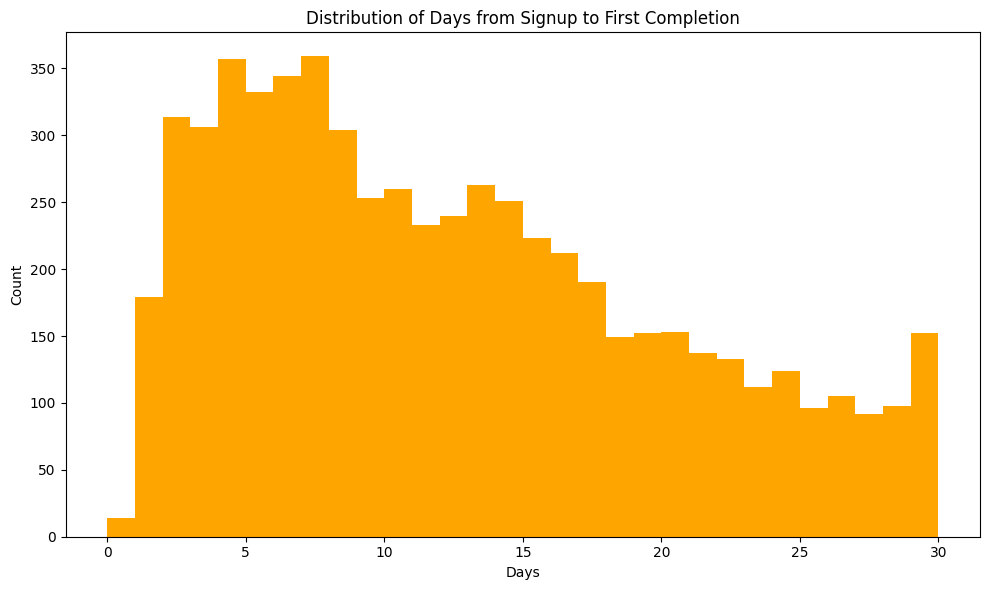

In [7]:
# First, let's check the data structure
print(df.info())
print(df.head())

# Convert date columns to datetime format
date_cols = ['signup_date', 'bgc_date', 'vehicle_added_date', 'first_completed_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Signups by City
plt.subplot(2, 2, 1)
city_counts = df['city_name'].value_counts()
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Signups by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 2. Signups by OS
plt.subplot(2, 2, 2)
os_counts = df['signup_os'].value_counts()
os_counts.plot(kind='bar', color='lightgreen')
plt.title('Signups by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 3. Signups by Channel
plt.subplot(2, 2, 3)
channel_counts = df['signup_channel'].value_counts()
channel_counts.plot(kind='bar', color='salmon')
plt.title('Signups by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 4. Signups Over Time (Daily)
plt.subplot(2, 2, 4)
daily_signups = df.set_index('signup_date').resample('D').size()
daily_signups.plot(color='purple')
plt.title('Daily Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')

plt.tight_layout()
plt.show()

# 5. Conversion Funnel Visualization
plt.figure(figsize=(8, 6))
funnel_steps = ['Signups', 'Background Check', 'Vehicle Added', 'First Completed']
funnel_values = [
    len(df),
    df['bgc_date'].notna().sum(),
    df['vehicle_added_date'].notna().sum(),
    df['first_completed_date'].notna().sum()
]

plt.barh(funnel_steps, funnel_values, color=['skyblue', 'lightgreen', 'salmon', 'purple'])
plt.title('Conversion Funnel')
plt.xlabel('Number of Users')
plt.xlim(0, len(df))
for i, v in enumerate(funnel_values):
    plt.text(v + 50, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

# 6. Vehicle Make Distribution (Top 10)
plt.figure(figsize=(10, 6))
top_makes = df['vehicle_make'].value_counts().head(10)
top_makes.plot(kind='bar', color='teal')
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Time from Signup to First Completion (for those who completed)
plt.figure(figsize=(10, 6))
completed = df[df['first_completed_date'].notna()]
completed['time_to_complete'] = (completed['first_completed_date'] - completed['signup_date']).dt.days
completed['time_to_complete'].plot(kind='hist', bins=30, color='orange')
plt.title('Distribution of Days from Signup to First Completion')
plt.xlabel('Days')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

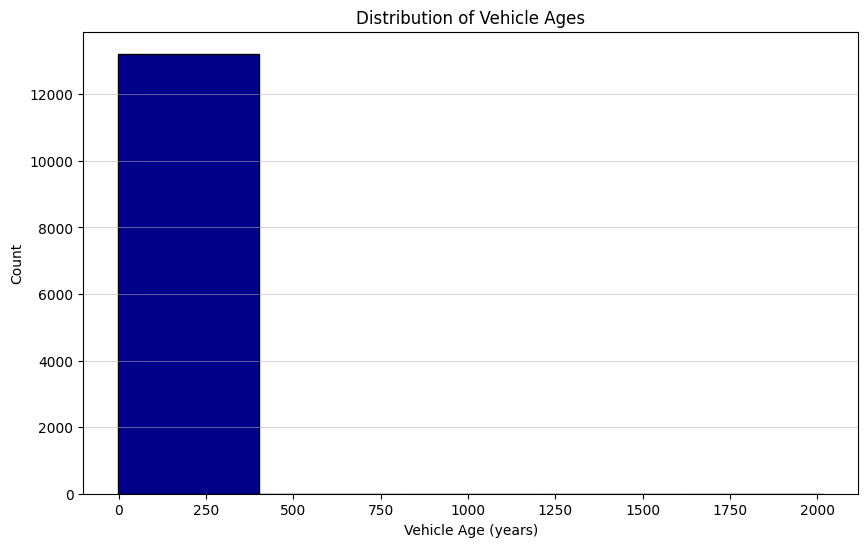

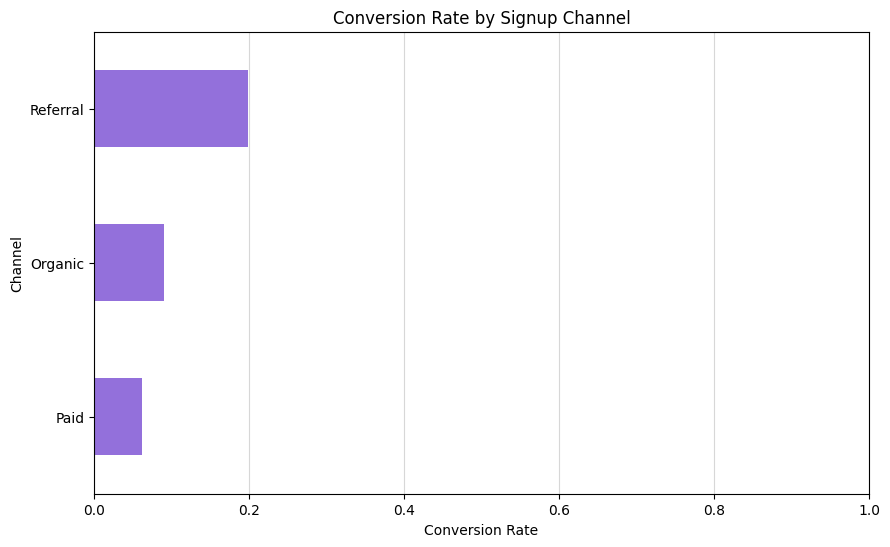

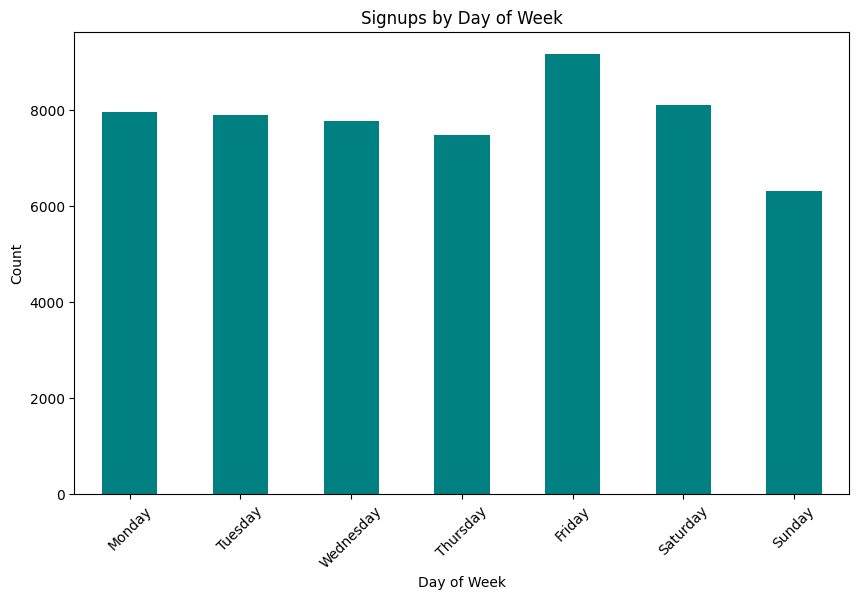

<Figure size 1200x600 with 0 Axes>

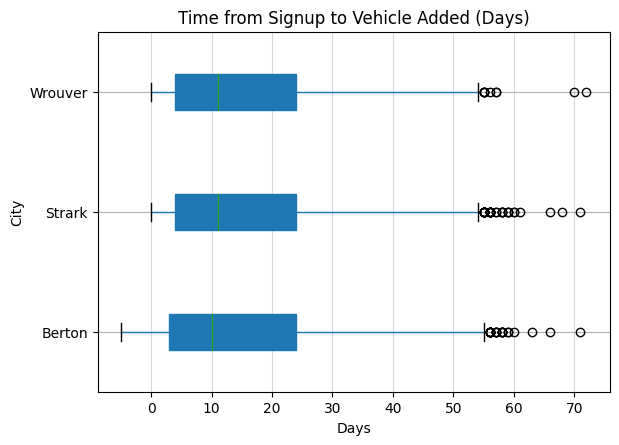

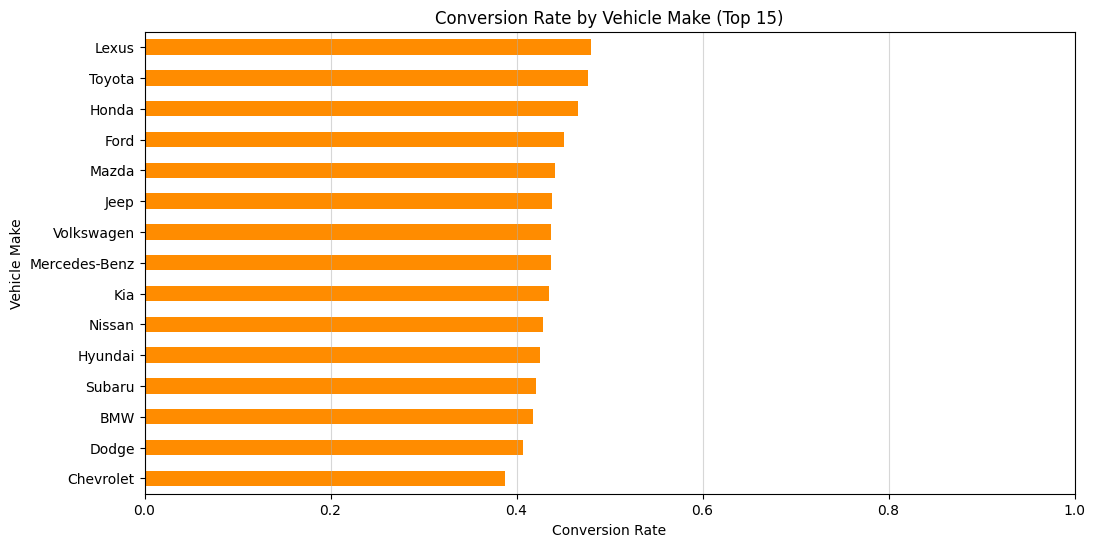

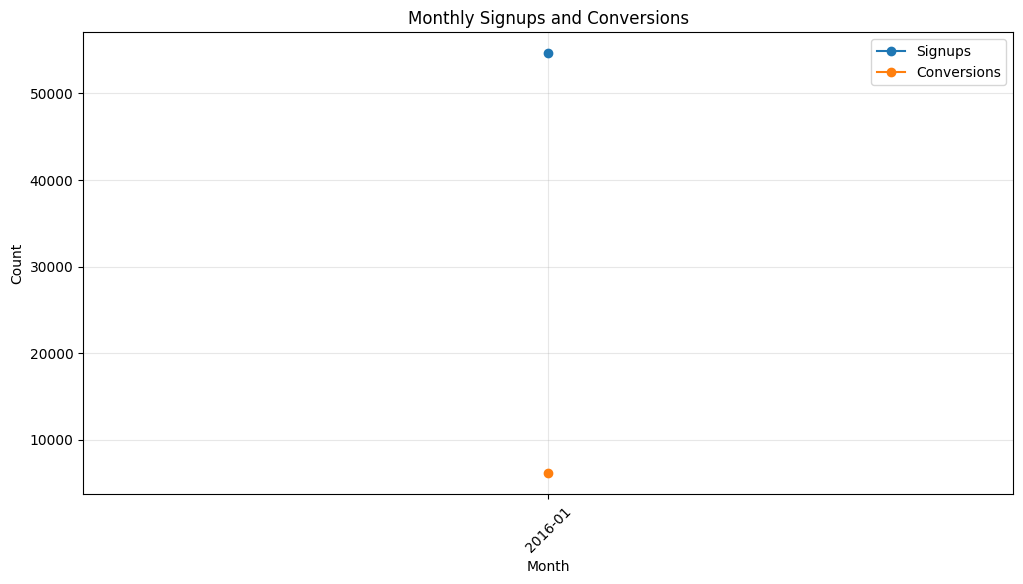

In [2]:
plt.figure(figsize=(10, 6))
df['vehicle_age'] = 2016 - df['vehicle_year']  # Assuming data is from 2016
df['vehicle_age'].dropna().plot(kind='hist', bins=5, color='darkblue', edgecolor='black')
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
conversion_by_channel = df.groupby('signup_channel')['first_completed_date'].apply(lambda x: x.notna().mean())
conversion_by_channel.sort_values().plot(kind='barh', color='mediumpurple')
plt.title('Conversion Rate by Signup Channel')
plt.xlabel('Conversion Rate')
plt.ylabel('Channel')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
df['signup_day'] = df['signup_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['signup_day'].value_counts().loc[day_order].plot(kind='bar', color='teal')
plt.title('Signups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
df['signup_to_vehicle'] = (df['vehicle_added_date'] - df['signup_date']).dt.days
df[df['signup_to_vehicle'].notna()].boxplot(column='signup_to_vehicle', by='city_name', 
                                           vert=False, patch_artist=True)
plt.title('Time from Signup to Vehicle Added (Days)')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Days')
plt.ylabel('City')
plt.grid(axis='x', alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
top_15_makes = df['vehicle_make'].value_counts().head(15).index
make_conversion = df[df['vehicle_make'].isin(top_15_makes)].groupby('vehicle_make')['first_completed_date'].apply(lambda x: x.notna().mean())
make_conversion.sort_values().plot(kind='barh', color='darkorange')
plt.title('Conversion Rate by Vehicle Make (Top 15)')
plt.xlabel('Conversion Rate')
plt.ylabel('Vehicle Make')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.5)
plt.show()

# Create cohorts based on signup month
df['signup_month'] = df['signup_date'].dt.to_period('M')
cohorts = df.groupby('signup_month').agg({
    'id': 'count',
    'first_completed_date': lambda x: x.notna().sum()
}).rename(columns={'id': 'signups', 'first_completed_date': 'conversions'})

plt.figure(figsize=(12, 6))
plt.plot(cohorts.index.astype(str), cohorts['signups'], marker='o', label='Signups')
plt.plot(cohorts.index.astype(str), cohorts['conversions'], marker='o', label='Conversions')
plt.title('Monthly Signups and Conversions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.show()